In [ ]:
# customer: Customer ID
#  state: US State
#  customer_lifetime_value: CLV is the client economic value for a company during all their relationship
#  response: Response to marketing calls (customer engagement)
#  coverage: Customer coverage type
# education: Customer education level
# effective_to_date: Effective to date
# employmentstatus: Customer employment status
# gender: Customer gender
# income: Customer income
# location_code: Customer living zone
# marital_status: Customer marital status
# monthly_premium_auto: Monthly premium
# months_since_last_claim: Last customer claim
# months_since_policy_inception: Policy Inception
# number_of_open_complaints: Open claims
# number_of_policies: Number policies
# policy_type: Policy type
# policy: Policy
# renew_offer_type: Renew
# sales_channel: Sales channel (customer-company first contact)
# total_claim_amount: Claims amount
# vehicle_class: Vehicle class
# vehicle_size: Vehicle size

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import linear_model
#import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
data=pd.read_csv('C:\\Users\hecto\PreWorks\W2/m_c_a_clean.csv')    # import csv file
data.head()   


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [26]:
data.shape

(9134, 24)

In [19]:
data_num=data.select_dtypes(include=np.number)
data_num.head(15)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
5,8256.297800,62902,69,14,94,0,2
6,5380.898636,55350,67,0,13,0,9
7,7216.100311,0,101,0,68,0,4
8,24127.504020,14072,71,13,3,0,2
9,7388.178085,28812,93,17,7,0,8


In [5]:
y=data_num['Total Claim Amount']
X=data_num.drop(['Total Claim Amount'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly Premium Auto           9134 non-null   int64  
 3   Months Since Last Claim        9134 non-null   int64  
 4   Months Since Policy Inception  9134 non-null   int64  
 5   Number of Open Complaints      9134 non-null   int64  
 6   Number of Policies             9134 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 499.6 KB


In [6]:
lm=linear_model.LinearRegression()
line=lm.fit(X,y)
lm.score(X,y)

0.5186628226558787

In [10]:
predic= lm.predict(X)
predic

array([248.90222187, 565.67760682, 474.06635556, ..., 512.28386782,
       503.42179961, 472.60712499])

In [11]:
r2_score(y, predic)

0.5186628226558787

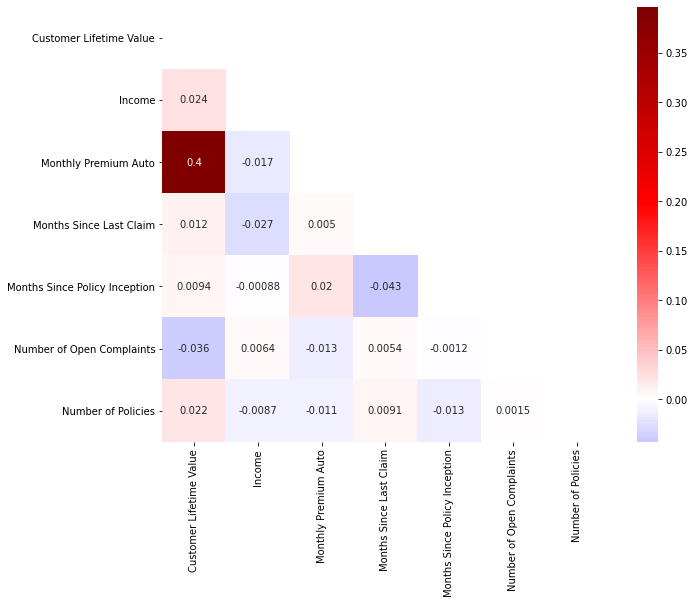

In [12]:
y=data['Total Claim Amount'] 
data=data.drop(['Total Claim Amount'],axis=1)
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = object)

correlations_matrix=data.corr()
mask=np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax=plt.subplots(figsize=(10,8))
ax= sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap='seismic', center=0)
plt.show()

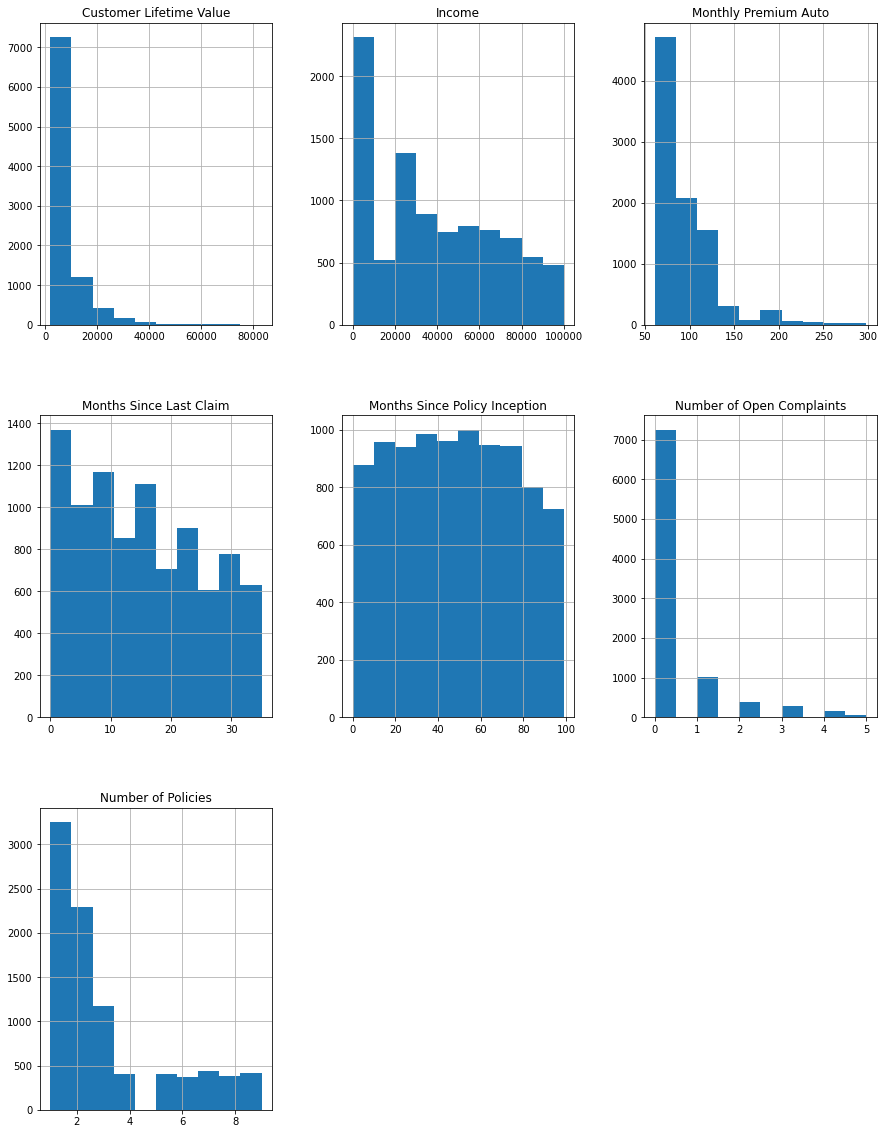

In [13]:
X_num.hist(figsize=(15,20));

<AxesSubplot:xlabel='Number of Policies'>

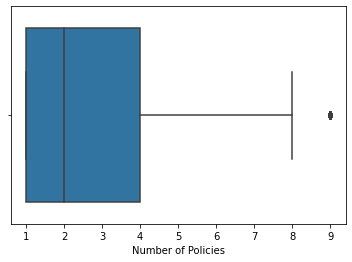

In [14]:
sns.boxplot(x=X_num['Number of Policies'])

<AxesSubplot:xlabel='Number of Open Complaints'>

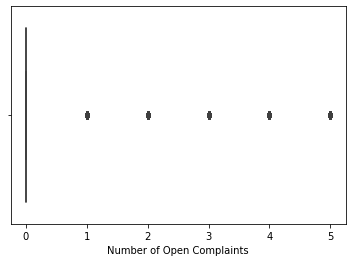

In [15]:
sns.boxplot(x=X_num['Number of Open Complaints'])

<AxesSubplot:xlabel='Customer Lifetime Value'>

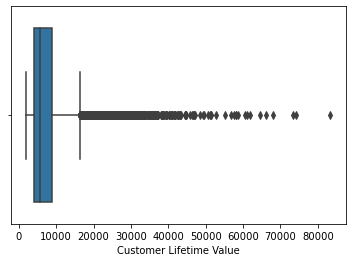

In [16]:
sns.boxplot(x=X_num['Customer Lifetime Value'])

<AxesSubplot:xlabel='Monthly Premium Auto'>

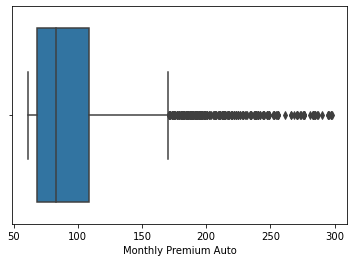

In [17]:
sns.boxplot(x=X_num['Monthly Premium Auto'])

In [21]:
X_num=X_num.drop(['Number of Open Complaints'],axis=1)

<AxesSubplot:xlabel='Monthly Premium Auto'>

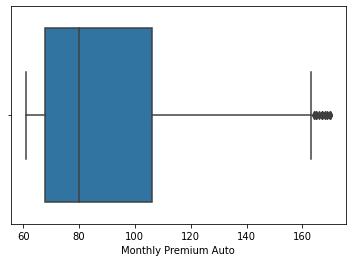

In [22]:
iqr=np.percentile(X_num['Monthly Premium Auto'],75)-np.percentile(X_num['Monthly Premium Auto'],25)
upper_limit=np.percentile(X_num['Monthly Premium Auto'],75)+(1.5*iqr)
lower_limit=np.percentile(X_num['Monthly Premium Auto'],25)-(1.5*iqr)
excl_outliers=X_num[(X_num['Monthly Premium Auto']>lower_limit)&(X_num['Monthly Premium Auto']<upper_limit)]
sns.boxplot(x=excl_outliers['Monthly Premium Auto'])


<AxesSubplot:>

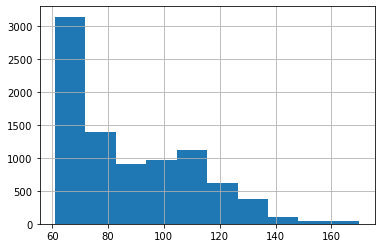

In [23]:
excl_outliers['Monthly Premium Auto'].hist()

In [27]:
excl_outliers.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies
count,8704.000000,8704.000000,8704.000000,8704.000000,8704.000000,8704.000000
mean,7577.478745,37669.705882,87.591567,15.084444,47.946921,2.965763
std,6192.134004,30463.877452,22.885502,10.058778,27.941271,2.386184
min,1898.007675,0.000000,61.000000,0.000000,0.000000,1.000000
25%,3873.647046,0.000000,68.000000,6.000000,24.000000,1.000000
50%,5597.124960,33806.000000,80.000000,14.000000,48.000000,2.000000
75%,8659.357603,62399.250000,106.000000,23.000000,71.000000,4.000000
max,57520.501510,99981.000000,170.000000,35.000000,99.000000,9.000000


In [29]:
def log_transform_clean(x):
    if x==0:
        return x
    else:
        return np.log(x)
    
X_num['Months Since Last Claim_log']=list(map(log_transform_clean,X_num['Months Since Last Claim']))

<AxesSubplot:>

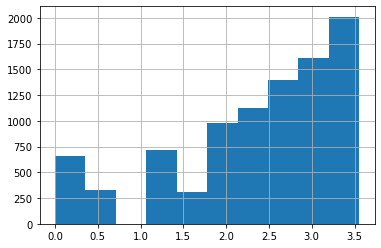

In [30]:
X_num['Months Since Last Claim_log'].hist()

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaler=scaler.fit_transform(X_num)
scaled=pd.DataFrame(x_scaler)

In [33]:
scaled.head()

,0,1,2,3,4,5,6
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.000,0.974795
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.875,0.721434
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.125,0.812964
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.750,0.812964
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.000,0.698921


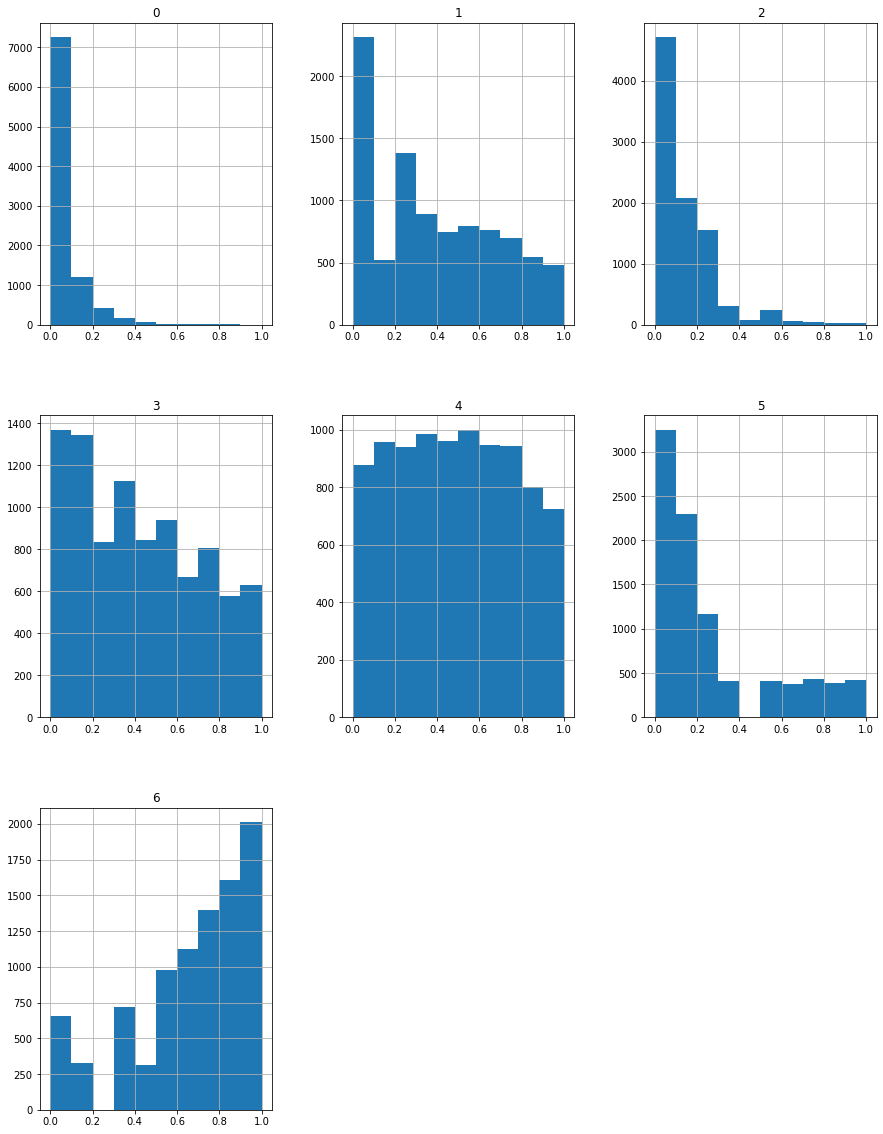

In [34]:
scaled.hist(figsize = (15,20));

In [36]:
X_cat

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [37]:
X_cat['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

In [38]:
X_cat['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [39]:
X_cat['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [41]:
X_cat['Marital Status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

In [42]:
X_cat['Sales Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

In [47]:
X_cat['Sales Channel'].value_counts().mean()

2283.5

In [76]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first',categories='auto').fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded


array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [100]:
preprocessing_dct={colname:[] for colname in X_cat.columns}
preprocessing_dct

{'Customer': [],
 'State': [],
 'Response': [],
 'Coverage': [],
 'Education': [],
 'Effective To Date': [],
 'EmploymentStatus': [],
 'Gender': [],
 'Location Code': [],
 'Marital Status': [],
 'Policy Type': [],
 'Policy': [],
 'Renew Offer Type': [],
 'Sales Channel': [],
 'Vehicle Class': [],
 'Vehicle Size': []}

In [146]:
class MultiColumnLabelEncoder(X_cat):
    X_cat_object_columns = X_cat.iloc[:, :].select_dtypes(include=['object']).columns
X_cat_copy_object_columns = X_cat.iloc[:, :].select_dtypes(include=['object']).columns
mcle = MultiColumnLabelEncoder(columns=object_columns)
mcle.fit(X_cat)
mcle.transform(X_cat)
mcle.all_labels_(X_cat)

ValueError: Index data must be 1-dimensional

In [140]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

X_cat= X_cat.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(X_cat)),columns=mlb.classes_)

TypeError: join() got an unexpected keyword argument 'columns'

In [78]:
X_cat_new

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [64]:
encoded.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [56]:
X=pd.concat((X_num,X_cat_new),axis=1)

In [62]:
X_cat_new.head()

,Customer,State,Response,Coverage,Effective To Date,EmploymentStatus,Location Code,Marital Status,Policy Type,Policy,...,Sales Channel,Vehicle Class,Vehicle Size,Gender_F,Gender_M,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master
0,BU79786,Washington,No,Basic,2/24/11,Employed,Suburban,Married,Corporate Auto,Corporate L3,...,Agent,Two-Door Car,Medsize,1,0,1,0,0,0,0
1,QZ44356,Arizona,No,Extended,1/31/11,Unemployed,Suburban,Single,Personal Auto,Personal L3,...,Agent,Four-Door Car,Medsize,1,0,1,0,0,0,0
2,AI49188,Nevada,No,Premium,2/19/11,Employed,Suburban,Married,Personal Auto,Personal L3,...,Agent,Two-Door Car,Medsize,1,0,1,0,0,0,0
3,WW63253,California,No,Basic,1/20/11,Unemployed,Suburban,Married,Corporate Auto,Corporate L2,...,Call Center,SUV,Medsize,0,1,1,0,0,0,0
4,HB64268,Washington,No,Basic,2/3/11,Employed,Rural,Single,Personal Auto,Personal L1,...,Agent,Four-Door Car,Medsize,0,1,1,0,0,0,0


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=40)

In [61]:
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train) 
predic=lm.predict(X_test) 
r2_score(y_test, predic)

ValueError: could not convert string to float: 'BC87161'